# 베이즈 통계학

## 2017년 12월 31일 안상호

---

### Source

- 책
    + 밑바닥부터 시작하는 데이터 과학
- 인터넷
    + ratsgo's [blog](https://ratsgo.github.io/statistics/2017/06/30/bayesinfer/)
- 강의
    + 흠..?
    
---

### 목차

1. 베이지안의 개념 및 설명
2. 베이지안 확률 구현
3. 나이브 베이즈
4. 적용
5. GAN 까지?

---

## 1. 베이지안의 개념 및 설명

### 1.1. 베이지안 확률이란?

#### 경험 확률 vs 베이지안 확률

- 경험 확률
    + 일어난 횟수/전체시도 횟수
    + $p(x) = \frac {occurence(x)}{N}$
- 베이지안 확률
    + 일어나지 않은 일에 대한 확률을 불확실성(uncertainty)의 개념으로 기술


### 1.2. 베이지안 추론이란?

#### 정의

> **베이즈 추론(Bayesian inference)**은 통계적 추론의 한 방법으로, 추론 대상의 사전 확률과 추가적인 정보를 통해 해당 대상의 사후 확률을 추론하는 방법이다. 베이즈 추론은 베이즈 확률론을 기반으로 하며, 이는 추론하는 대상을 확률변수로 보아 그 변수의 확률분포를 추정하는 것을 의미한다.

> [출처][위키백과](https://ko.wikipedia.org/wiki/%EB%B2%A0%EC%9D%B4%EC%A6%88_%EC%B6%94%EB%A1%A0)

#### 수학적 설명 

> 베이즈 추론 문제에서는 추론 대상 $\theta$에 대하여, $\theta$에 대한 사전 확률 $p(\theta)$가 주어진다. 여기서 $\theta$ 와 관계된 관측 ${\displaystyle X}$의 확률 분포가 ${\displaystyle p(X|\theta )}$와 같이 주어진다고 할 때, 베이즈 추론은 $X$가 추가적으로 주어졌을 때의 $\theta$ 의 분포 ${\displaystyle p(\theta |X)}$를 계산한다. 이때 ${\displaystyle p(\theta |X)}$는 베이즈 정리를 이용하여 다음과 같이 계산할 수 있다.
>> 사전확률 $p(\theta)$과 우도확률 $p(X|\theta)$을 안다면 사후확률 $p(\theta|X)$를 알 수 있다

$${\displaystyle p(\theta |X)={\frac {p(\theta, X)}{p(X)}}={\frac {p(X|\theta )p(\theta )}{p(X)}}}$$

#### 예시를 들어서 설명해보자 

> 긴머리의 사람을 보았다. 여자일까 남자일까? 

- 주변 사람을 보니 여자 50명, 남자 50명에 긴머지의 여자가 25명, 짧은 머리의 여자가 25명이었으며, 짧은 머리의 나마가 48명 긴머리의 남자가 2명이었다. 
    + 사전 확률 & 우도 확률
        - $P(여자)$ = 50/100 = 0.5 | $P(남자)$ = 50/100 = 0.5
        - $P(긴머리|여자)$ = 25/50 = 0.5 | $P(긴머리|남자)$ = 2/50 = 0.04
        - $P(긴머리, 여자)$ = $P(긴머리|여자)P(여자)$ = 0.5*0.5 = 0.25
        - $P(긴머리, 남자)$ = $P(긴머리|남자)P(남자)$ = 0.04*0.5 = 0.02
    + 사후 확률
        - $P(남자|긴머리)$ = $\frac {P(긴머리|남자)P(남자)}{P(긴머리)}$ = $\frac {0.02}{0.27}$ = $0.07$ 
        - $P(여자|긴머리)$ = $\frac {P(긴머리|여자)P(여자)}{P(긴머리)}$ = $\frac {0.25}{0.27}$ = $0.92$ 

따라서 주변 상황을 고려했을 때 긴머리의 뒷모습을 보이고 있는 사람은 여자라고 결론을 내리게 되었다.

- 상황이 달라진다면 어떨까?

[출처](http://ddiri01.tistory.com/234)

In [27]:
from __future__ import division

def He_OR_She(manNum = 50, womenNum = 50, manLong=2, womenLong=25):
    totalNum = manNum + womenNum
    totalLong = manLong + womenLong
    print("전체 인원은 {}이고, 전체 긴머리 인원은 {}입니다.".format(totalNum, totalLong))
    
    ### 사전 확률
    P_Long = totalLong/totalNum
    P_He = manNum/totalNum
    P_She = womenNum/totalNum
    
    ### 우도 확률
    P_Long_He = manLong/manNum
    P_Long_She = womenLong/womenNum
    
    ### 사후 확률
    P_He_long = (P_Long_He*P_He)/P_Long ### = P(He and Long)/P(Long)
    P_She_Long = (P_Long_She*P_She)/P_Long ### = P(She and Long)/P(Long)

    return P_He_long, P_She_Long

# He_OR_She()
result = He_OR_She()
# result = He_OR_She(manNum=98, womenNum=2, manLong=4, womenLong=1)
print("긴머리가 남자일 확률 = {} \n긴머리가 여자일 확률 = {}".format(result[0], result[1]))

전체 인원은 100이고, 전체 긴머리 인원은 27입니다.
긴머리가 남자일 확률 = 0.0740740740741 
긴머리가 여자일 확률 = 0.925925925926


---

## 2. 베이지안 확률 구현

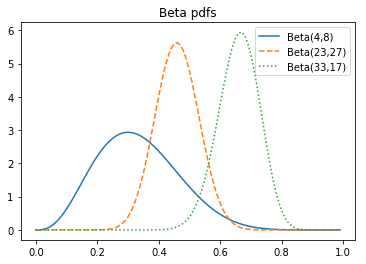

In [28]:
import math
from matplotlib import pyplot as plt
def B(alpha, beta):
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)
def beta_pdf(x, alpha, beta):
    # [0, 1] 구간 밖에서는 밀도가 없음
    if x < 0 or x > 1:
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)


%matplotlib inline
xs = [x / 100.0 for x in range(0,100)]
plt.plot(xs,[beta_pdf(x,alpha=4,beta=8) for x in xs],'-',label='Beta(4,8)')
plt.plot(xs,[beta_pdf(x,alpha=23,beta=27) for x in xs],'--',label='Beta(23,27)')
plt.plot(xs,[beta_pdf(x,alpha=33,beta=17) for x in xs],':',label='Beta(33,17)')
plt.legend()
plt.title('Beta pdfs')
plt.show()

---

## 3. 나이브 베이즈 분류기 (Naive Bayesian Classifier)

[참고][나이브 베이즈 분류기](https://ratsgo.github.io/machine%20learning/2017/05/18/naive/)

방법은 알았으니 pandas로 구현하는 걸로!

### 3.1. 모델

`문서`$d$가 주어졌을 때 `범주1`$c_1$ 이냐 `범주2`$c_2$이냐의 문제 (예를 들면 Recommand, Not Recommand)

$${\displaystyle p(c_1|d)={\frac {p(c_1, d)}{p(d)}}={\frac {p(d|c_1)p(c_1)}{p(d)}}}$$
$${\displaystyle p(c_2|d)={\frac {p(d|c_2)p(c_2)}{p(d)}}}$$

이제 중요한 것은 `문서`가$d$가 $w_1, w_2, ... w_i$ 개의 단어로 구성되어 있다는 사실이다. 

나이브 베이즈에서는 각 단어들이 독립임을 가정하기 때문에 $P$(`문서`) = $P(d)$ = $P(w_1, w_2, ... w_i)$ = $P(w_1)P(w_2)...P(w_i)$로 재구성하여 계산한다.

이는 간단히 표기하여 $P(w_1,w_2)$ = $P(w_1)⋅P(w_2)$ 성립됨을 알 수 있는데 따라서 $P(w_1,w_2|c_i)=P(w_1|c_i)⋅P(w_2|c_i)$


즉, $P(w_i|c_i)$ 를 찾아서 다 곱하면 되는 것인데 필요한 것은?

> **사전 확률** = $P(추천), P(비추천)$ 

> **우도 확률** = $P(d|추천)$, $P(d|비추천)$ 

> **사후 확률** = $P(추천|d$, $P(비추천|d)$  

1. $P(추천)$ | $P(비추천)$ 
2. $P(w_i)$
3. $P(w_i|추천)$ | $P(w_i|비추천)$
4. $P(w_i, 추천)$ | $P(w_i, 비추천)$ 

### 3.2. bag-of-words

- 데이터 load


In [1]:
import pandas as pd

review = pd.read_csv("data/steam_GTA5_review.csv", encoding="utf8")
review = review[review['rev_text'].notnull()]
print(review.size)
review.head()

94925


,rev_date,rev_text,rev_helpful,rev_games,rev_recommend
0,24 January,Things I Have Never Done in GTA Online Used Ha...,3 039 of 3 280 people 93 found this re...,133.0,Not Recommended
1,28 February,600 hours Great game Came back on to have some...,1 347 of 1 465 people 92 found this re...,163.0,Not Recommended
2,23 January,Banned in the middle of a game for no reason w...,806 of 889 people 91 found this review...,38.0,Not Recommended
3,30 August 2016,Let me start at the beginning in order to accu...,1 548 of 1 699 people 91 found this re...,87.0,Not Recommended
4,21 January,I used to love this game so much I ve played m...,874 of 965 people 91 found this review...,81.0,Not Recommended


- 리뷰 텍스트 데이터 전처리 함수 생성
    + 텍스트 추출/ 기호문자 제거/ 단어 분리/ stopwords
    + word2vec은 stopwords를 하지 않는 편이 더 결과가 좋다.
    + **Why?** 알고리즘이 문장의 맥락에 의존 
    + 숫자도

In [2]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist(review, remove_stopwords = False):
    # review_text = re.sub("Review ", "", review)
    review_text = BeautifulSoup(review).get_text() # 텍스트 추출
    review_text = re.sub(" [^a-zA-Z]", " ", review_text) # 기호문자 제거
    words = review_text.lower().split() # 소문자 변환 후 분리
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return words

In [3]:
t = review["rev_text"][3]
# print(review_to_wordlist(t))

In [4]:
# Load the punkt tokenizer
import nltk.data
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# 토크나이즈 함수생성(리뷰->토큰)
def review_to_sentences(review, tokenizer, remove_stopwords = False):
    # 1. 문단을 문장으로 스플릿
    raw_sentences = tokenizer.tokenize(review.strip())
    
    # 2. 문장들을 빈리스트에 하나씩 추가
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0: # 비어있는 문장은 스킵
            sentences.append(review_to_wordlist(raw_sentence, remove_stopwords))
    return sentences # (each sentence is a list of words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
sentences = []

print("Parsing sentences from review_set")
for rev in review["rev_text"]:
    sentences += review_to_sentences(rev, tokenizer)

Parsing sentences from review_set


/usr/local/lib/python2.7/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [6]:
import numpy as np

print(review["rev_recommend"][1])

sentences = np.array(sentences)
# print(sentences[1:3])

Not Recommended


- 숫자를 세서 넣어보자
    + 결과물은 리스트인데, element들이 단어(key): 카운트(value) 쌍임 

In [7]:
bag_of_word_list = []

for i in range(len(sentences)):
    bag_of_word_dict_i = {}
    
    for word in set(sentences[i]):
        bag_of_word_dict_i[word] = sentences[i].count(word)
    bag_of_word_list.append(bag_of_word_dict_i)

In [8]:
print(bag_of_word_list[1])

{u'all': 3, u'just': 2, u'regulars': 1, u'cheat': 2, u'money': 1, u'years': 1, u'customer': 1, u'hell': 1, u'fine': 1, u'before': 1, u'how': 1, u'had': 3, u'except': 1, u'better': 1, u'to': 14, u'finally': 1, u'going': 2, u'happened': 2, u'then': 2, u'them': 1, u'around': 3, u'get': 2, u'ceo': 2, u'banned': 1, u'modes': 2, u'me': 4, u'game': 3, u'five': 1, u'updates': 1, u'they': 5, u'not': 1, u'blast': 1, u'wont': 1, u'like': 1, u'lost': 1, u'did': 1, u'button': 1, u'try': 1, u'these': 1, u't': 2, u'liars': 1, u'ban': 1, u'page': 1, u'eula': 1, u'old': 1, u'people': 1, u'violated': 1, u'some': 2, u'back': 2, u'hacks': 1, u'decided': 1, u'are': 1, u'our': 1, u'happen': 1, u'best': 1, u'out': 2, u'even': 2, u'reviews': 1, u'missed': 1, u'driving': 1, u'review': 2, u'beaten': 1, u'grinding': 1, u'ive': 1, u'enough': 1, u'won': 1, u'new': 2, u'racing': 1, u'email': 1, u'told': 1, u'deciding': 1, u'be': 2, u'we': 3, u'full': 1, u'never': 1, u'answers': 1, u'hours': 1, u'fun': 2, u'reason':

### 3.3. 식 세우기


#### 3.3.1.  $P(추천)$ | $P(비추천)$ 

In [9]:
from __future__ import division


total_Rec = review[review["rev_recommend"] == "Not Recommended"].size
print(total_Rec)

total_NRec = review[review["rev_recommend"] == "Recommended"].size 
print(total_NRec)

P_Rec = total_Rec/(total_Rec + total_NRec)
P_NRec = total_NRec/(total_Rec + total_NRec)

print("P(추천) {}, P(비추천) {}".format(P_Rec, P_NRec))

31680
63245
P(추천) 0.333737160917, P(비추천) 0.666262839083


#### 3.3.2. $P(w_i)$

In [11]:
import collections 

# del counter
counter = collections.Counter()
for d in bag_of_word_list: 
    counter.update(d)
counter.keys()
# bag_of_word_list[0]

[u'00mbit',
 u'raining',
 u'fawk',
 u'paul',
 u'optamized',
 u'foul',
 u'luanch',
 u'four',
 u'poopface',
 u'woods',
 u'gamestory',
 u'hanging',
 u'aggression',
 u'shure',
 u'increase',
 u'\u0436\u0438\u043b\u043b\u0430\u0436',
 u'quadruple',
 u'originality',
 u'bannedturns',
 u'lordie',
 u'immature',
 u'nooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo',
 u'\ub358\uac00',
 u'sinking',
 u'onlinethere',
 u'navigating',
 u'965',
 u'oceans',
 u'jouait',
 u'stipulate',
 u'charrackter',
 u'quiting',
 u'leisurely',
 u'oceano',
 u'rezalet',
 u'stabbed',
 u'screaming',
 u'igngood',
 u'jrpg',
 u'wooded',
 u'basics',
 u'illegitment',
 u'purcahse',
 u'wooden',
 u'commenter',
 u'wednesday',
 u'tarbux',
 u'persisted',
 u'stereotypical',
 u'commented',
 u'homeboyknowing',
 u'expeirence',
 u'specially',
 u'playeble',
 u'rebuilding',
 u'agrega',
 u'enabledhope',
 u

In [12]:
import pandas as pd

term_df = pd.DataFrame()
term_df["word"] = counter.keys()
term_df["count"] = counter.values()
term_df.head()

,word,count
0,00mbit,1
1,raining,16
2,fawk,1
3,paul,4
4,optamized,1


In [13]:
term_df["ratio"] = term_df["count"]/sum(term_df["count"])
term_df.head()
# total_w = sum(counter.values())
# for k, v in counter.items():
#     counter[k] = counter[k]/total_w
# print(counter)
# P_w = counter
# counter.values()/sum(counter.values())

,word,count,ratio
0,00mbit,1,8.073808e-07
1,raining,16,1.291809e-05
2,fawk,1,8.073808e-07
3,paul,4,3.229523e-06
4,optamized,1,8.073808e-07


In [28]:
# len(set(P_w.keys()))

28365

#### 3.3.3. $P(w_i|추천)$ | $P(w_i|비추천)$

- 우선 각각 추천인 문장과 비추천인 문장을 분류

In [95]:
from itertools import compress

Rec_sentences = list(compress(sentences, review["rev_recommend"] == "Recommended"))
NRec_sentences = list(compress(sentences, review["rev_recommend"] != "Recommended"))     

print(len(Rec_sentences), len(NRec_sentences))
# Rec_sentences = sentences[]
# NRec_sentences = sentences[review["rev_recommend"] != "Recommended"]

(12649, 6336)


- 추천 and w_i를 찾는다

한 문장에서 중복은 고려하지 않고 단지 있는지 없는지에 따라 check

In [96]:
idx = term_df.index[term_df.word == "small"][0]
idx
# term_df.iloc[idx]["Rec_word"]

1828

In [97]:
rec_d_Num = len(Rec_sentences)
Rec_count_temp = []

for word in term_df["word"]:
    check_temp = []
    for i in range(rec_d_Num):
        check_temp.append(word in Rec_sentences[i])
    Rec_count_temp.append(sum(check_temp))

print(Rec_count_temp)
term_df.assign(Rec_count = Rec_count_temp)
# term_df["Rec_count"] = Rec_count_temp

#     idx = term_df.index[term_df.word == word][0]
#     term_df.iloc[idx]["Rec_word"] = sum(check_temp)

term_df.head()
# rec_word_Num = {}
# for word in counter.keys():
#     print(word)
#     check_temp = []
#     for i in range(rec_d_Num):
#         check_temp.append(word in Rec_sentences[i])
#     rec_word_Num[word] = sum(check_temp)
# rec_word_Num
# counter.keys() word_list

[0, 10, 0, 4, 1, 2, 0, 37, 0, 10, 3, 16, 3, 0, 16, 1, 0, 2, 0, 1, 7, 2, 0, 8, 0, 2, 2, 2, 1, 1, 0, 3, 4, 1, 0, 1, 16, 1, 0, 0, 4, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 7, 0, 3, 1, 2, 3, 1, 0, 1, 0, 11, 1, 0, 1, 0, 0, 14, 1, 0, 3, 1, 1, 1, 4, 2, 0, 1, 2, 1, 5, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 10, 3, 2, 0, 0, 2, 63, 0, 103, 2, 0, 0, 1, 2, 11, 2, 0, 0, 0, 4, 16, 2, 0, 1, 0, 1, 0, 0, 2, 8, 2, 0, 6, 3, 1, 2, 1, 0, 0, 1, 0, 1, 3, 103, 15, 1, 12, 2, 3, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 26, 1, 1, 0, 0, 1, 2, 23, 5, 2, 0, 0, 1, 2, 0, 1, 0, 80, 2, 1, 0, 2, 2, 0, 0, 24, 3, 0, 670, 0, 1, 46, 1, 2, 1, 0, 15, 0, 69, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 6, 1, 0, 0, 0, 2, 0, 119, 0, 0, 0, 1, 42, 0, 0, 1, 1, 1, 6, 0, 1, 0, 0, 3, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 5, 4, 1, 2, 1, 3, 20, 1, 14, 183, 0, 1, 0, 7, 0, 1, 3, 2, 1, 3, 52, 2, 2, 0, 0, 0, 0, 1, 3, 45, 1, 0, 0, 1, 4, 0, 5, 1, 0, 1, 0, 0, 4, 0, 1, 1, 2, 0, 53, 1, 1, 2, 289, 1, 1, 0, 1, 0, 3, 39, 2, 2, 40, 2, 7, 1, 1, 5, 35, 458, 7, 12, 1, 0, 2, 4, 2, 2, 

,word,count,ratio
0,00mbit,1,8.073808e-07
1,raining,16,1.291809e-05
2,fawk,1,8.073808e-07
3,paul,4,3.229523e-06
4,optamized,1,8.073808e-07


In [103]:
term_df["Rec_count"] = Rec_count_temp

print(term_df.shape[0])
term_df.head()

28365


,word,count,ratio,Rec_count
0,00mbit,1,8.073808e-07,0
1,raining,16,1.291809e-05,10
2,fawk,1,8.073808e-07,0
3,paul,4,3.229523e-06,4
4,optamized,1,8.073808e-07,1


In [109]:
Rec_term_df = term_df[term_df["Rec_count"] != 0].copy()
Rec_term_df.head()

,word,count,ratio,Rec_count
1,raining,16,1.291809e-05,10
3,paul,4,3.229523e-06,4
4,optamized,1,8.073808e-07,1
5,foul,5,4.036904e-06,2
7,four,77,6.216832e-05,37


In [110]:
Rec_term_df["Rec_ratio"] = (Rec_term_df["Rec_count"])/len(Rec_sentences)
Rec_term_df.head()

,word,count,ratio,Rec_count,Rec_ratio
1,raining,16,1.291809e-05,10,0.000791
3,paul,4,3.229523e-06,4,0.000316
4,optamized,1,8.073808e-07,1,0.000079
5,foul,5,4.036904e-06,2,0.000158
7,four,77,6.216832e-05,37,0.002925


따라서 $P(w_i, 추천) = P(w_i|추천)P(추천)$  

In [120]:
(Rec_term_df["Rec_ratio"]*P_Rec)/Rec_term_df["ratio"]

1        20.424433
3        32.679092
4        32.679092
5        13.071637
7        15.702940
9        25.137763
10       32.679092
11       16.866628
12       32.679092
14       13.071637
15       32.679092
17       32.679092
19       32.679092
20       19.062804
21       32.679092
23       21.786061
25       32.679092
26       32.679092
27       32.679092
28       32.679092
29       16.339546
31       24.509319
32       32.679092
33       32.679092
35       32.679092
36       22.733281
37       32.679092
40       16.339546
42       32.679092
43       21.786061
           ...    
28328    13.522383
28330    10.893031
28331    32.679092
28332    32.679092
28333    24.509319
28335    20.424433
28337    16.339546
28338    10.893031
28339    32.679092
28341    10.893031
28342     5.027553
28343    32.679092
28344    32.679092
28345    32.679092
28346    32.679092
28347    32.679092
28348    32.679092
28350     8.714425
28351    32.679092
28352    10.893031
28355    32.679092
28356    32.